In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as md
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
plt.style.use("fivethirtyeight")
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator

In [50]:
# E-Commerce
SHOP = pd.read_csv('./Data_II/E-Commerce/SHOP.csv')
ETSY = pd.read_csv('./Data_II/E-Commerce/ETSY.csv')
WIX = pd.read_csv('./Data_II/E-Commerce/WIX.csv')
GDDY = pd.read_csv('./Data_II/E-Commerce/GDDY.csv')

# Food
KR = pd.read_csv('./Data_II/Food/KR.csv')
MCD = pd.read_csv('./Data_II/Food/MCD.csv')
NSRGY = pd.read_csv('./Data_II/Food/NSRGY.csv')
SBUX = pd.read_csv('./Data_II/Food/SBUX.csv')

# Retail
BBY = pd.read_csv('./Data_II/Retail/BBY.csv')
HD = pd.read_csv('./Data_II/Retail/HD.csv')
WMT = pd.read_csv('./Data_II/Retail/WMT.csv')
TGT = pd.read_csv('./Data_II/Retail/TGT.csv')


# Finance
C = pd.read_csv('./Data_II/Finance/C.csv')
GDOT = pd.read_csv('./Data_II/Finance/GDOT.csv')
JPM = pd.read_csv('./Data_II/Finance/JPM.csv')
PYPL = pd.read_csv('./Data_II/Finance/PYPL.csv')

# Data Cleansing

In [25]:
# E-Commerce
columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
SHOP = SHOP[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
ETSY = ETSY[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
WIX = WIX[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
GDDY = GDDY[columns_to_keep]


# Food
columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
KR = KR[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
MCD = MCD[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
NSGRY = NSRGY[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
SBUX = SBUX[columns_to_keep]

# Retail
columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
BBY = BBY[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
HD = HD[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
WMT = WMT[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
TGT = TGT[columns_to_keep]

# Finance
columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
C = C[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
GDOT = GDOT[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
JPM = JPM[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
PYPL = PYPL[columns_to_keep]

print(GDOT)

# SHOP[columns_to_keep].plot()

# x = SHOP['Date']
# y1 = SHOP['Open']
# y2 = SHOP['Close']
# ax = SHOP['Open'].plot()
# ax2 = ax.twinx()
# ax2.plot(y2, color='orange')
# plt.show()

            Date       Open      Close  Volume
0     2015-12-14  16.180000  16.040001  367800
1     2015-12-15  16.090000  16.500000  264000
2     2015-12-16  16.670000  16.719999  311800
3     2015-12-17  16.750000  16.629999  277300
4     2015-12-18  16.510000  16.230000  946700
...          ...        ...        ...     ...
1254  2020-12-07  55.209999  55.730000  241200
1255  2020-12-08  55.610001  56.810001  422800
1256  2020-12-09  57.400002  57.790001  884200
1257  2020-12-10  57.630001  58.279999  401700
1258  2020-12-11  58.119999  56.180000  419600

[1259 rows x 4 columns]


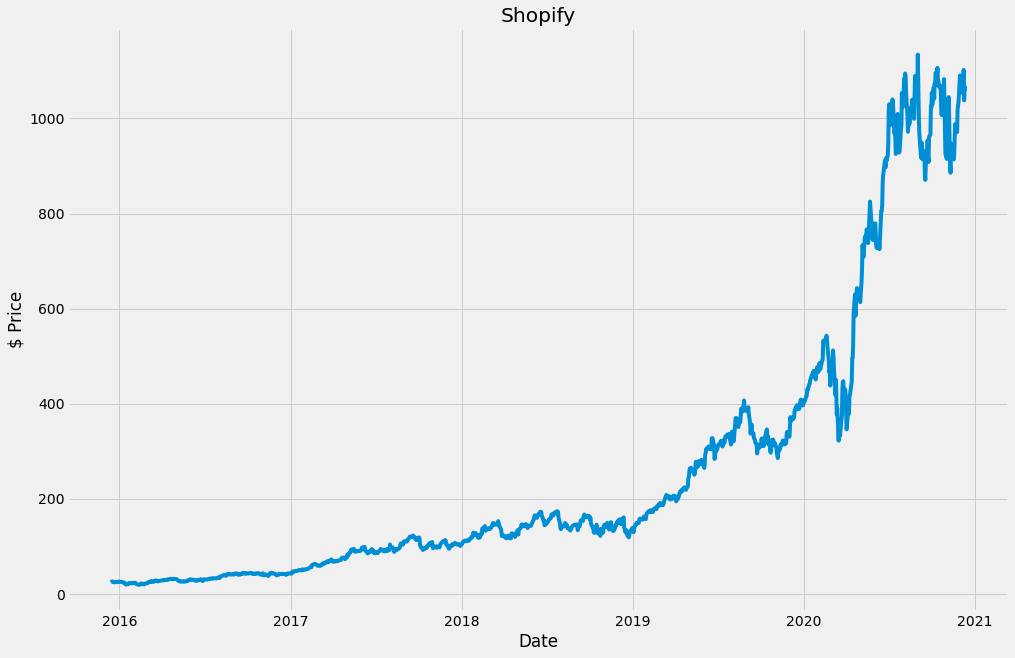

In [51]:
# plt.plot(SHOP['Date'], SHOP['Close'])
# plt.title('Shopify')
# plt.show()

# plt.plot(SHOP['Date'], SHOP['Close'])
# plt.title('Shopify')
# ax = plt.gca().get_xaxis()

# ax.set_major_locator(MultipleLocator(1))
# ax.set_minor_locator(MultipleLocator(0.1))
# ax.set_major_formatter(SHOP.DateFormatter('%Y-%M'))

# for item in ax.get_ticklabels():
#     item.set_rotation(45)

SHOP['Date']=pd.to_datetime(SHOP['Date'])
SHOP.set_index('Date',inplace=True)
plt.figure(figsize=(15,10))
plt.plot(SHOP.index, SHOP['Close'])
plt.xlabel("Date")
plt.ylabel("$ Price")
plt.title("Shopify")
plt.show()

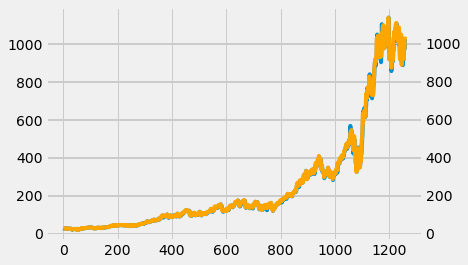

In [21]:
x = SHOP['Date']
y1 = SHOP['Open']
y2 = SHOP['Close']
ax = SHOP['Open'].plot()
ax2 = ax.twinx()
ax2.plot(y2, color='orange')
plt.show()


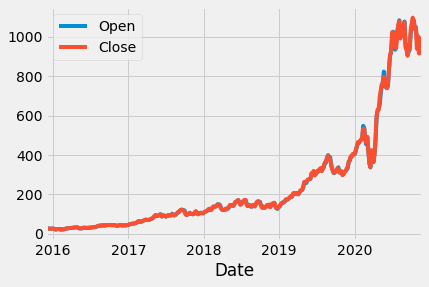

In [22]:
# SHOP.set_index('Date', inplace=True)

# x = SHOP['Date']
# y1 = SHOP['Open']
# y2 = SHOP['Close']
# ax = SHOP['Open'].plot()
# ax2 = ax.twinx()
# ax2.plot(y2, color='orange')
# plt.show()

SHOP['Date']=pd.to_datetime(SHOP['Date'])
SHOP.set_index('Date',inplace=True)
Shop_5D = SHOP.resample('5D').mean()
Shop_5D.plot()


In [6]:
Shop_7D.head()

,Open,Close
Date,,
2015-11-30,26.5500,26.596000
2015-12-07,25.7500,25.577999
2015-12-14,25.4160,25.594000
2015-12-21,24.9075,24.842500
2015-12-28,25.3125,25.450000


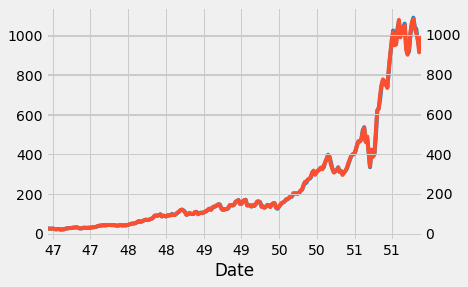

In [7]:
x = Shop_7D.index
y1 = Shop_7D['Open']
y2 = Shop_7D['Close']
ax = Shop_7D['Open'].plot()
ax = Shop_7D['Close'].plot()
ax2 = ax.twinx()
ax2.plot(y2, color='orange')
date_form = DateFormatter("%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

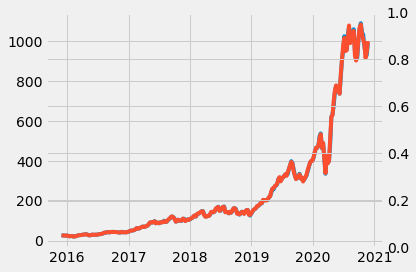

In [8]:
fig, ax1 = plt.subplots(tight_layout=True) 
ax1.plot(x, y1)
ax1.twinx()
ax1.plot(x, y2)
plt.show()